Non-functional example. TODO remove

In [ ]:
import numpy as np
from scipy.stats import t as stats_t
from scipy.stats import ttest_ind

import seaborn as sns

def make_t_test(trace_length: int):
    """
    Returns a t-test that takes the sample mean and variance for a list of sample points from A, and a list of sample
    points for B.
    """
    sqrt_n = np.sqrt(trace_length)
    n_min = trace_length - 1

    def welch_t_test(a: np.array, b: np.array):
        mean_a, var_a = a
        mean_b, var_b = b

        m = mean_a - mean_b
        s = np.sqrt(var_a + var_b) / sqrt_n

        t = m / s

        dof = (var_a + var_b) ** 2 / ((var_a ** 2 + var_b ** 2) / n_min)

        p = 2 * stats_t(df=dof).cdf(-np.abs(t))

        return t, p

    return welch_t_test

In [30]:
class StatTest:
    test: (np.array, np.array)

class StatsT(StatTest):
    test = lambda x, y: ttest_ind(x, y, axis=0, equal_var=False)

class TVLA:
    def __init__(self, core: StatTest):
        self.test = core
        self.var = np.astype(0, np.complex256)
        self.mean = np.astype(0, np.complex256)
        self.max_t = 0

In [31]:
def gen_example(mean, trace_num, trace_len=1400):
    return np.array([[np.random.normal(mean, 2.2) for _ in range(trace_len)] for _ in range(trace_num)])

def get_mv(x: np.array):
    return x.mean(), x.var()

num_traces = 100
ex_a = gen_example(2, num_traces)
ex_b = gen_example(2, num_traces)

In [32]:
def accumulate(traces):
    ixs = range(1, len(ex_a) + 1)

    m, v = traces.mean(axis=1, dtype=np.float128), traces.var(axis=1, dtype=np.float128)
    res = np.array(list(zip(np.cumsum(m) / ixs, np.cumsum(v) / ixs)))

    return res.astype(np.float64)

accumulate(ex_a)[0:5]

array([[2.10119656, 5.08785009],
       [2.02973399, 4.98953972],
       [1.97236127, 5.01588706],
       [1.97390802, 4.99368482],
       [1.98142038, 4.96227005]])

In [33]:
test = make_t_test(1400)
acc = accumulate(ex_a)

ps = np.array([test(get_mv(ex_a[i + 1]), acc[i])[1] for i in range(num_traces - 1)])
def get_gradient(values: np.array):
    x_acc = np.zeros(values.shape)
    x_min = 0
    for ix, x in enumerate(values):
        x_max = min(x, x_min)
        x_acc[ix] = x_min

    return x_acc

get_gradient(ps)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<AxesSubplot:>

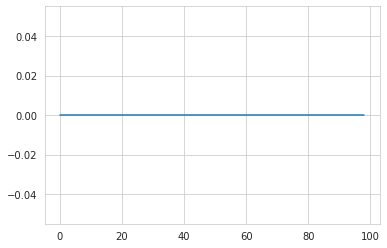

In [34]:
sns.set_style('whitegrid')
sns.lineplot(data=get_gradient(ps))

In [35]:
ex_a_s = get_mv(ex_a).shape

res_sp = ttest_ind(ex_a, ex_b, axis=1, equal_var=False)

res_custom = test(get_mv(ex_a), get_mv(ex_b))

print(res_custom[1])
print(res_sp[1])

AttributeError: 'tuple' object has no attribute 'shape'